<a href="https://colab.research.google.com/github/drcrajc/project_ai_use_case/blob/main/umlcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Install PlantUML and Graphviz
!apt-get install graphviz -y
!pip install plantuml

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


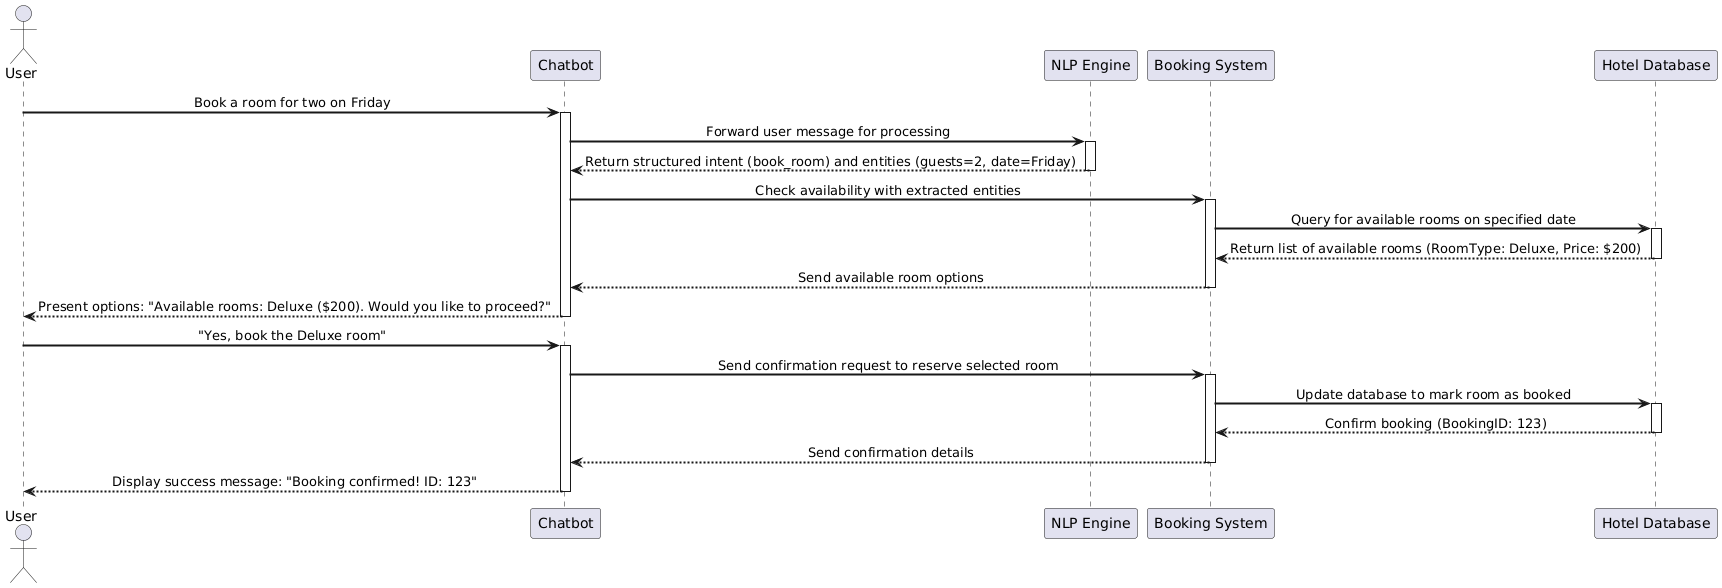

UML diagram for Hotel Booking Chatbot has been generated successfully.
UML code saved to 'hotel_booking_chatbot.puml'. You can use this with any PlantUML renderer.


In [8]:
import os
import plantuml
from IPython.display import Image, display

# Create PlantUML code for the hotel booking chatbot sequence diagram
uml_code = """
@startuml
skinparam backgroundColor white
skinparam sequenceArrowThickness 2
skinparam sequenceGroupBackgroundColor #f5f5f5
skinparam sequenceMessageAlign center

actor User
participant "Chatbot" as Chatbot
participant "NLP Engine" as NLP
participant "Booking System" as BookingSystem
participant "Hotel Database" as Database

User -> Chatbot : Book a room for two on Friday
activate Chatbot

Chatbot -> NLP : Forward user message for processing
activate NLP
NLP --> Chatbot : Return structured intent (book_room) and entities (guests=2, date=Friday)
deactivate NLP

Chatbot -> BookingSystem : Check availability with extracted entities
activate BookingSystem

BookingSystem -> Database : Query for available rooms on specified date
activate Database
Database --> BookingSystem : Return list of available rooms (RoomType: Deluxe, Price: $200)
deactivate Database

BookingSystem --> Chatbot : Send available room options
deactivate BookingSystem

Chatbot --> User : Present options: "Available rooms: Deluxe ($200). Would you like to proceed?"
deactivate Chatbot

User -> Chatbot : "Yes, book the Deluxe room"
activate Chatbot

Chatbot -> BookingSystem : Send confirmation request to reserve selected room
activate BookingSystem

BookingSystem -> Database : Update database to mark room as booked
activate Database
Database --> BookingSystem : Confirm booking (BookingID: 123)
deactivate Database

BookingSystem --> Chatbot : Send confirmation details
deactivate BookingSystem

Chatbot --> User : Display success message: "Booking confirmed! ID: 123"
deactivate Chatbot

@enduml
"""

# Function to render the UML diagram
def render_uml_diagram(uml_code):
    # Create a temporary directory for the PlantUML files if it doesn't exist
    if not os.path.exists('plantuml_temp'):
        os.makedirs('plantuml_temp')

    # Set up PlantUML server
    plantuml_server = "http://www.plantuml.com/plantuml/img/"

    # Create a PlantUML instance
    pl = plantuml.PlantUML(url=plantuml_server)

    # Save the UML code to a file
    uml_file_path = 'plantuml_temp/hotel_booking_chatbot.puml'
    with open(uml_file_path, 'w') as f:
        f.write(uml_code)

    # Generate the diagram image file path
    img_path = 'plantuml_temp/hotel_booking_chatbot.png'

    # Generate the diagram image
    pl.processes_file(uml_file_path, outfile=img_path)

    # Display the diagram
    display(Image(img_path))

    print("UML diagram for Hotel Booking Chatbot has been generated successfully.")
    return img_path

# Render the UML diagram
diagram_path = render_uml_diagram(uml_code)

# Additional function to save UML code to be used manually if needed
def save_uml_code(uml_code):
    with open('hotel_booking_chatbot.puml', 'w') as f:
        f.write(uml_code)
    print("UML code saved to 'hotel_booking_chatbot.puml'. You can use this with any PlantUML renderer.")

# Save the UML code for manual use if needed
save_uml_code(uml_code)